In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py

import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

import nltk
from nltk.corpus import stopwords

Download dataset for Reviews from here - https://www.kaggle.com/snap/amazon-fine-food-reviews/version/2

I have tried a simple sentiment Model using Logistic Regression. No Feature Selection was required as we have take "Summary" and "Scores" as the input and output, discarding all other data

In [ ]:
#Download dataset for Reviews from here - https://www.kaggle.com/snap/amazon-fine-food-reviews/version/2

In [8]:
df = pd.read_csv('Reviews.csv')
df.head()

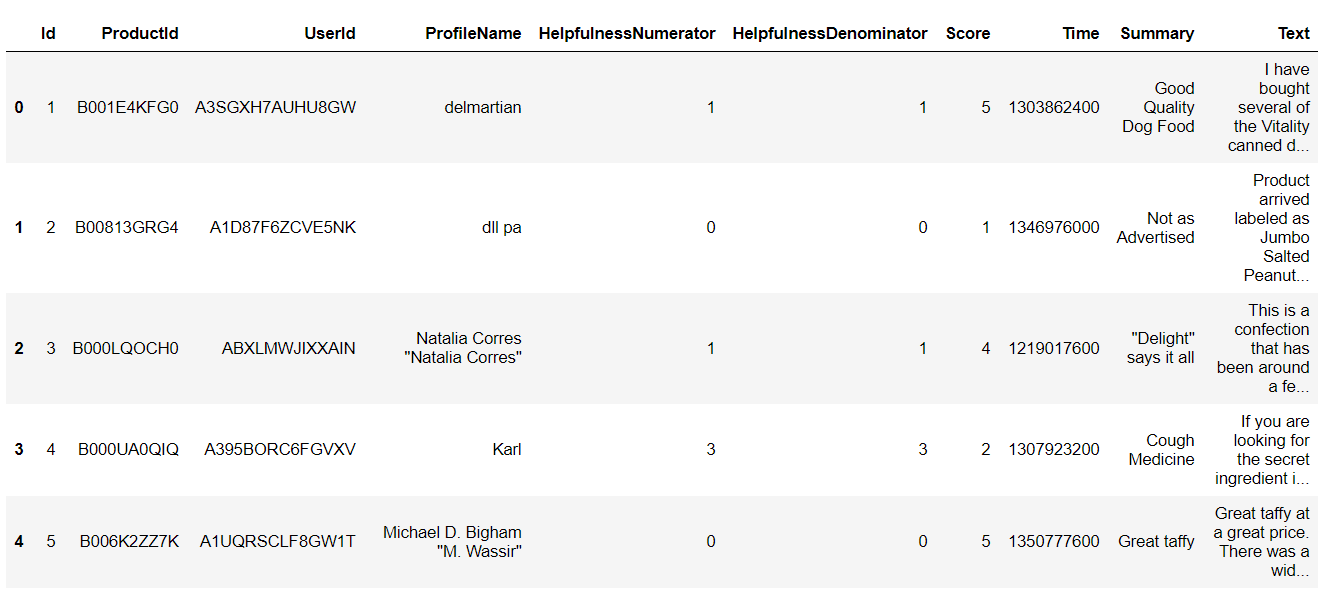

**Data Analysis**

In [9]:

py.init_notebook_mode(connected=True)

# Product Scores
fig = px.histogram(df, x="Score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

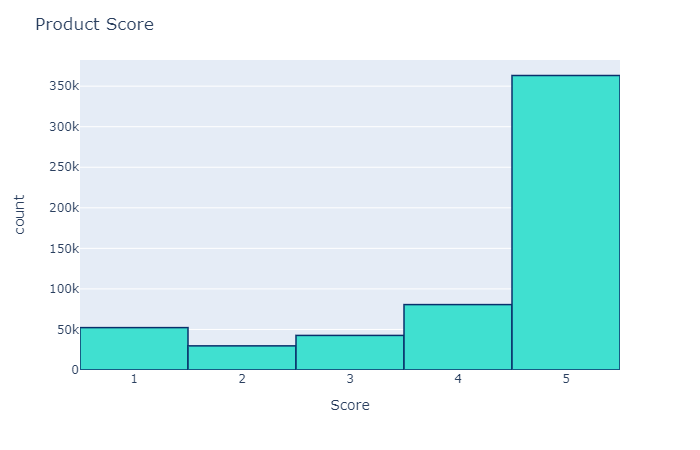

Now, we can create some wordclouds to see the most frequently used words in the reviews.

In [10]:

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()


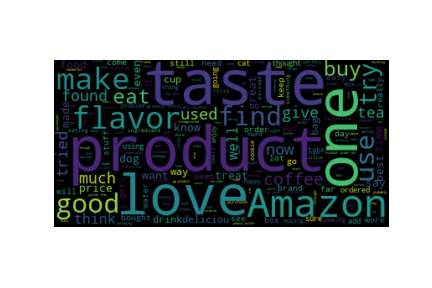

Classifying Reviews as 1 or -1 sentiment based on the score given by Customers

In [11]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)

In [12]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

Word Cloud for Positive and Negative Sentiment Summaries - 
The words “good” and “great” initially appeared in the negative sentiment word cloud, despite being positive words. This is probably because they were used in a negative context, such as “not good.” Due to this, I removed those two words from the word cloud

In [13]:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href","good","great"]) 
## good and great removed because they came up in negative sentiment word cloud too. Maybe customer used them in reference as "not good"

In [14]:
neg = " ".join(review for review in negative.Summary)
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [15]:
pos = " ".join(review for review in positive.Summary)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

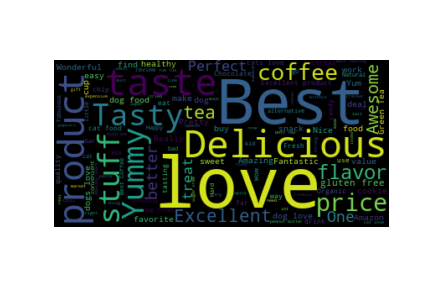

In [16]:
df['sentimentt'] = df['sentiment'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

Most of the customer reviews are positive in the dataset.

In [17]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

In [18]:
dfNew = df[['Summary','sentiment']]
dfNew.head()

In [22]:
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

Converting Text to Integer Matrix (Tokenizer)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['Summary'])
test_matrix = vectorizer.transform(test['Summary']

**Model**

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [25]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [26]:
lr.fit(X_train,y_train)

In [27]:
predictions = lr.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

In [29]:
print(classification_report(predictions,y_test))

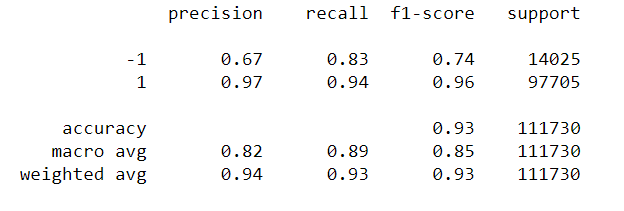